# Problem Statement

The goal of this project is to predict the accident severity based on various features such as number of vehicles, number of casualties, day of the week, time of the day, weather conditions, road surface conditions, etc. The accident severity is an important parameter that can help the authorities take measures to reduce the number of accidents and improve road safety.

Based on the given dataset, we can build a machine learning model that can predict the accident severity based on the historical data. We can use various classification algorithms such as logistic regression, decision trees, random forest, etc. to build the model. Once the model is trained, we can use it to predict the accident severity for new instances based on the features of the accident. The performance of the model can be evaluated using various metrics such as accuracy, precision, recall, etc.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!unzip -q "/content/drive/MyDrive/Sri/road_acc_3/Data_excel.zip"

replace Data_excel/test_set_clean.xlsx? [y]es, [n]o, [A]ll, [N]one, [r]ename: A


In [1]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

# To scale the data using z-score 
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

# Algorithms to use
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from sklearn.linear_model import LogisticRegression

from sklearn.neighbors import KNeighborsClassifier

# Metrics to evaluate the model
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve

# For tuning the model
from sklearn.model_selection import GridSearchCV

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Reading the dataset
df_train = pd.read_excel('/content/Data_excel/train_set_clean.xlsx')
df_test = pd.read_excel('/content/Data_excel/test_set_clean.xlsx')

In [3]:
df_train.head().T

,0,1,2,3,4
accident_index,2020122001268,2019140895070,2019360832516,2019121901482,2021161018349
accident_year,0.815922,0.109792,0.109792,0.109792,1.522051
accident_reference,122001268,140895070,360832516,121901482,161018349
accident_severity,0,0,0,0,0
number_of_vehicles,0,0,0,0,0
number_of_casualties,0,0,0,0,0
date,03/11/2020,04/11/2019,05/04/2019,26/10/2019,28/01/2021
day_of_week,-0.587847,-1.110776,0.980941,1.50387,0.458012
time,17:45,13:11,12:30,10:30,12:49
local_authority_highway,E10000023,E08000019,E10000020,E06000014,E06000010


In [4]:
df_train.shape,df_test.shape

((260000, 24), (64987, 24))

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260000 entries, 0 to 259999
Data columns (total 24 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   accident_index                               260000 non-null  object 
 1   accident_year                                260000 non-null  float64
 2   accident_reference                           260000 non-null  object 
 3   accident_severity                            260000 non-null  int64  
 4   number_of_vehicles                           260000 non-null  int64  
 5   number_of_casualties                         260000 non-null  int64  
 6   date                                         260000 non-null  object 
 7   day_of_week                                  260000 non-null  float64
 8   time                                         260000 non-null  object 
 9   local_authority_highway                      260000 non-nul

In [6]:
# Checking the number of unique values in each column
df_train.nunique()

accident_index                                 260000
accident_year                                       5
accident_reference                             259140
accident_severity                                   1
number_of_vehicles                                  1
number_of_casualties                                1
date                                             1826
day_of_week                                         7
time                                             1440
local_authority_highway                           208
road_type                                           1
speed_limit                                         6
junction_detail                                    10
junction_control                                    6
pedestrian_crossing_human_control                   4
pedestrian_crossing_physical_facilities             7
light_conditions                                    5
weather_conditions                                  9
road_surface_conditions     

- It seems that our target column severity needs to be replaced as it has 0 everyone so for the intuition of machine learning we will try to replace the value in this column with 3 severity values

In [7]:
# loop through each row of the dataframe and replace the accident_severity value if it's zero
for index, row in df_train.iterrows():
    if row['accident_severity'] == 0:
        df_train.at[index, 'accident_severity'] = np.random.randint(1, 4)

In [8]:
df_train.accident_severity.value_counts()

2    86828
1    86797
3    86375
Name: accident_severity, dtype: int64

<b> Dropping all the unrequired columns

In [9]:
# removing columns like indexes that would lead to overfit and also removing columns which have a unique category over the whole notebook
df_train = df_train.drop(['accident_index','accident_reference','date','time','local_authority_highway','lsoa_of_accident_location','number_of_vehicles','number_of_casualties','road_type'],axis =1)
# removing columns like indexes that would lead to overfit and also removing columns which have a unique category over the whole notebook
df_test = df_test.drop(['accident_index','accident_reference','date','time','local_authority_highway','lsoa_of_accident_location','number_of_vehicles','number_of_casualties','road_type'],axis =1)


In [10]:
df_train.head().T

,0,1,2,3,4
accident_year,0.815922,0.109792,0.109792,0.109792,1.522051
accident_severity,1.000000,1.000000,2.000000,3.000000,3.000000
day_of_week,-0.587847,-1.110776,0.980941,1.503870,0.458012
speed_limit,30.000000,30.000000,60.000000,30.000000,30.000000
junction_detail,6.000000,1.000000,3.000000,3.000000,3.000000
junction_control,2.000000,4.000000,4.000000,4.000000,4.000000
pedestrian_crossing_human_control,0.000000,0.000000,0.000000,0.000000,0.000000
pedestrian_crossing_physical_facilities,5.000000,0.000000,0.000000,0.000000,0.000000
light_conditions,4.000000,1.000000,1.000000,1.000000,1.000000
weather_conditions,1.000000,2.000000,1.000000,2.000000,1.000000


It seems day of week and accident_year are given in some different encoded format so we will try to keep them and use as required.

In [11]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260000 entries, 0 to 259999
Data columns (total 15 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   accident_year                                260000 non-null  float64
 1   accident_severity                            260000 non-null  int64  
 2   day_of_week                                  260000 non-null  float64
 3   speed_limit                                  260000 non-null  int64  
 4   junction_detail                              260000 non-null  int64  
 5   junction_control                             260000 non-null  int64  
 6   pedestrian_crossing_human_control            260000 non-null  int64  
 7   pedestrian_crossing_physical_facilities      260000 non-null  int64  
 8   light_conditions                             260000 non-null  int64  
 9   weather_conditions                           260000 non-nul

Andd by looking into the data, it seems, -
- accident_year: This column has only 5 unique values, which suggests that it might actually be categorical data rather than numerical data.
- day_of_week: This column has 7 unique values, which suggests that it might actually be categorical data rather than numerical data.
- accident_severity: This column already has the int64 datatype, which is appropriate for numerical data. However, if it's supposed to be categorical data (e.g. indicating the severity level of an accident as "fatal", "serious", or "minor"), 
- Similarly it seems all the other columns are categorical columns seeing the unique values so they can be converted into category

In [12]:
df_train['accident_year'] = df_train['accident_year'].astype('category')
df_train['day_of_week'] = df_train['day_of_week'].astype('category')
df_train['accident_severity'] = df_train['accident_severity'].astype('category')

df_train['pedestrian_crossing_human_control'] = df_train['pedestrian_crossing_human_control'].astype('category')
df_train['pedestrian_crossing_physical_facilities'] = df_train['pedestrian_crossing_physical_facilities'].astype('category')
df_train['light_conditions'] = df_train['light_conditions'].astype('category')
df_train['weather_conditions'] = df_train['weather_conditions'].astype('category')
df_train['special_conditions_at_site'] = df_train['special_conditions_at_site'].astype('category')
df_train['carriageway_hazards'] = df_train['carriageway_hazards'].astype('category')
df_train['did_police_officer_attend_scene_of_accident'] = df_train['did_police_officer_attend_scene_of_accident'].astype('category')


In [13]:
df_test['accident_year'] = df_test['accident_year'].astype('category')
df_test['day_of_week'] = df_test['day_of_week'].astype('category')
df_test['accident_severity'] = df_test['accident_severity'].astype('category')

df_test['pedestrian_crossing_human_control'] = df_test['pedestrian_crossing_human_control'].astype('category')
df_test['pedestrian_crossing_physical_facilities'] = df_test['pedestrian_crossing_physical_facilities'].astype('category')
df_test['light_conditions'] = df_test['light_conditions'].astype('category')
df_test['weather_conditions'] = df_test['weather_conditions'].astype('category')
df_test['special_conditions_at_site'] = df_test['special_conditions_at_site'].astype('category')
df_test['carriageway_hazards'] = df_test['carriageway_hazards'].astype('category')
df_test['did_police_officer_attend_scene_of_accident'] = df_test['did_police_officer_attend_scene_of_accident'].astype('category')


### EDA

In [14]:
num_cols = ['speed_limit', 'junction_detail', 'junction_control', 'road_surface_conditions', 'urban_or_rural_area']
cat_cols = ['accident_year','day_of_week','accident_severity','pedestrian_crossing_human_control','pedestrian_crossing_physical_facilities','light_conditions',
             'weather_conditions', 'special_conditions_at_site','carriageway_hazards','did_police_officer_attend_scene_of_accident']

In [15]:
# Checking summary statistics
df_train[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
speed_limit,260000.0,33.301423,11.108171,20.0,30.0,30.0,30.0,70.0
junction_detail,260000.0,5.866996,13.375617,0.0,3.0,3.0,6.0,99.0
junction_control,260000.0,3.751288,1.262031,0.0,4.0,4.0,4.0,9.0
road_surface_conditions,260000.0,1.379600,1.010841,1.0,1.0,1.0,2.0,9.0
urban_or_rural_area,260000.0,1.221046,0.415434,1.0,1.0,1.0,1.0,3.0


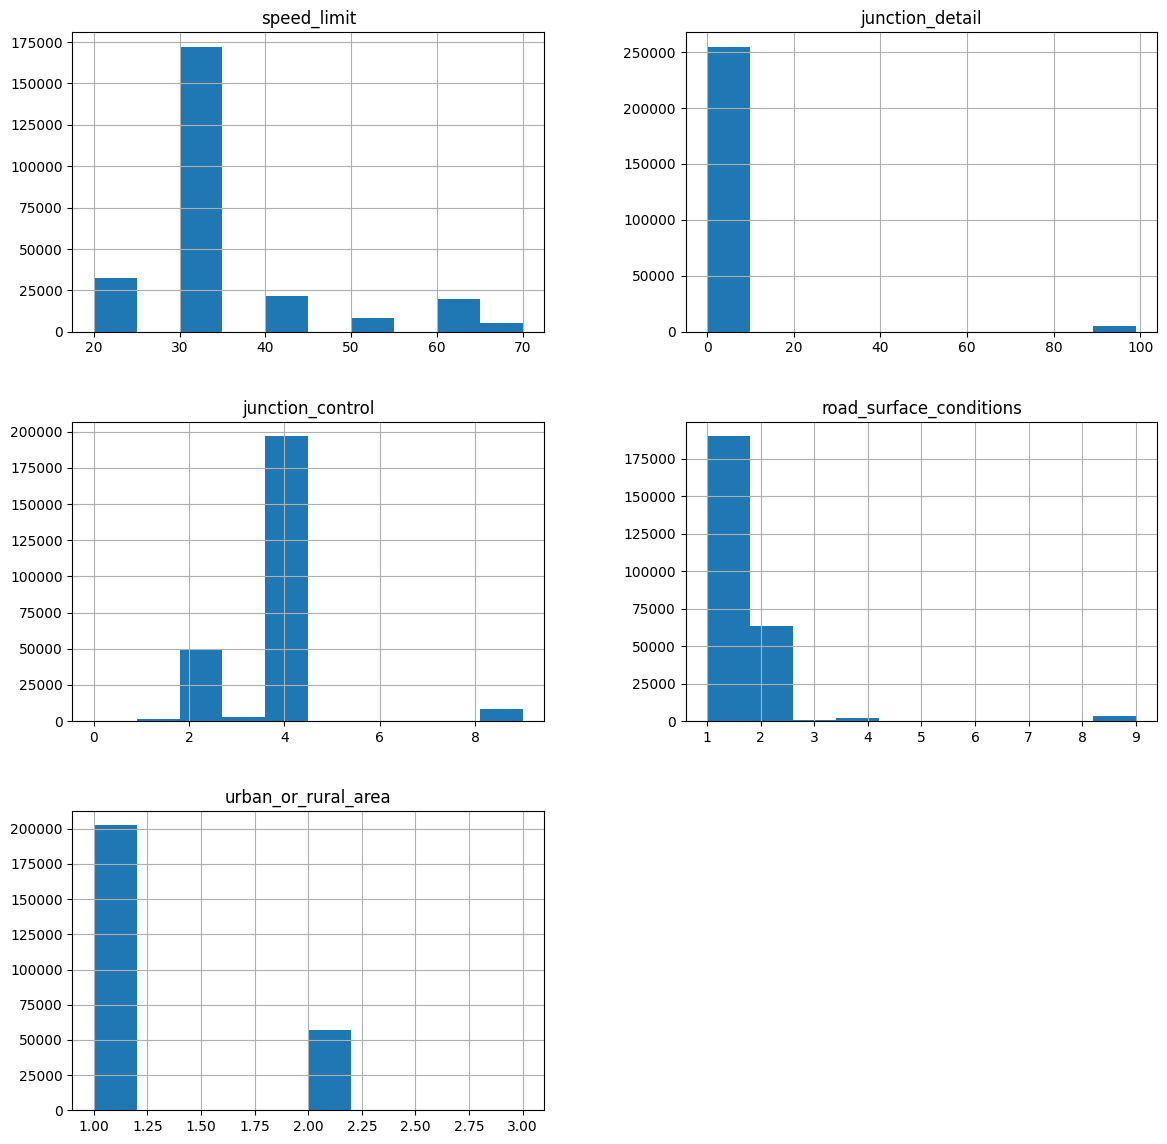

In [16]:
# Creating histograms
df_train[num_cols].hist(figsize = (14, 14))

plt.show()

<b> Univariate for categorical variables

In [17]:
for i in cat_cols:
    print(df_train[i].value_counts(normalize = True))
    
    print('*' * 40)

-1.302466693918713     0.232004
-0.5963372114637313    0.215727
0.1097922709912503     0.208881
1.522051235901214      0.180862
0.8159217534462321     0.162527
Name: accident_year, dtype: float64
****************************************
0.9809409755144712     0.164858
0.4580116618799645     0.153392
-0.0649176517545422    0.152719
-0.5878469653890489    0.149754
-1.110776279023556     0.140750
1.503870289148978      0.131312
-1.633705592658062     0.107215
Name: day_of_week, dtype: float64
****************************************
2    0.333954
1    0.333835
3    0.332212
Name: accident_severity, dtype: float64
****************************************
0    0.944062
9    0.038308
2    0.013335
1    0.004296
Name: pedestrian_crossing_human_control, dtype: float64
****************************************
0    0.694262
5    0.116869
4    0.069712
1    0.048146
9    0.034842
8    0.033381
7    0.002788
Name: pedestrian_crossing_physical_facilities, dtype: float64
****************************

<b> Bivariate and Multivariate analysis

**We have analyzed different categorical and numerical variables. Let's now check how does accident_severity is related with other categorical variables**

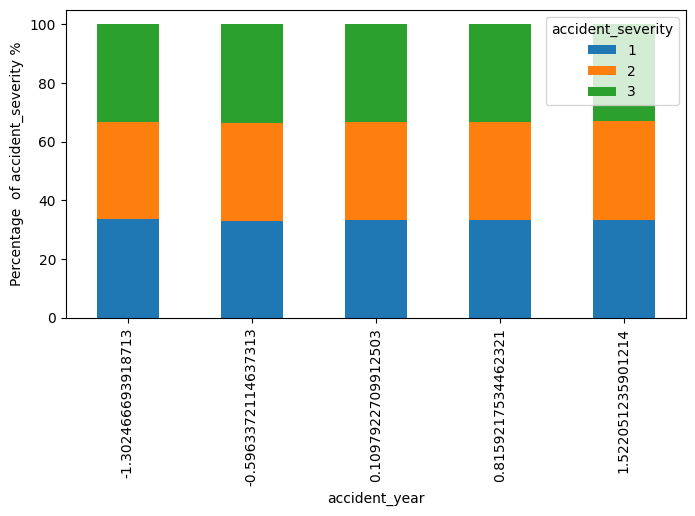

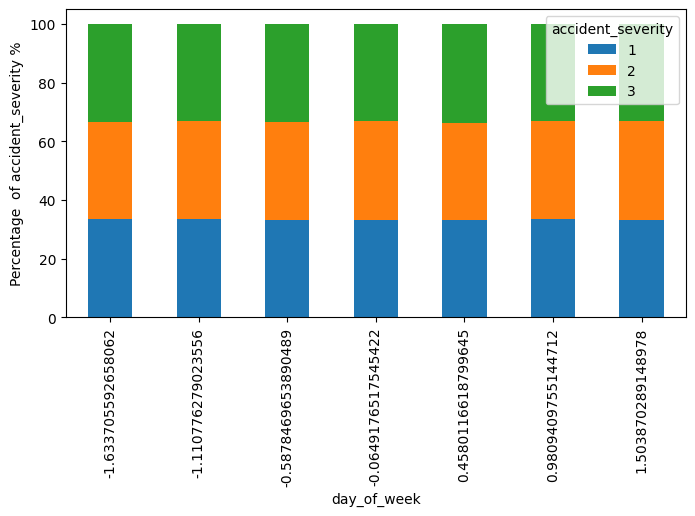

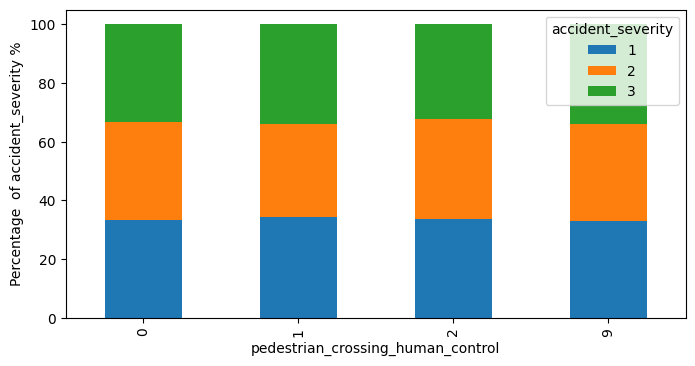

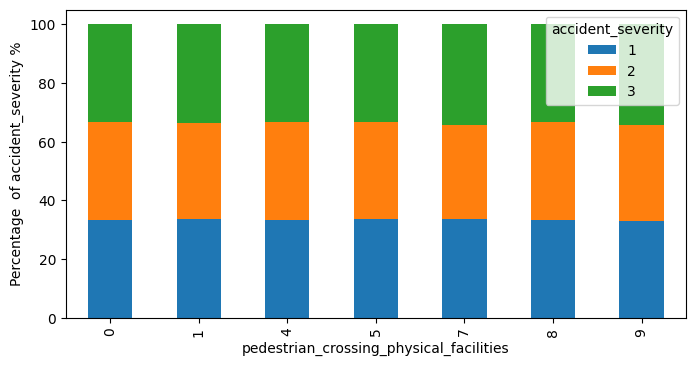

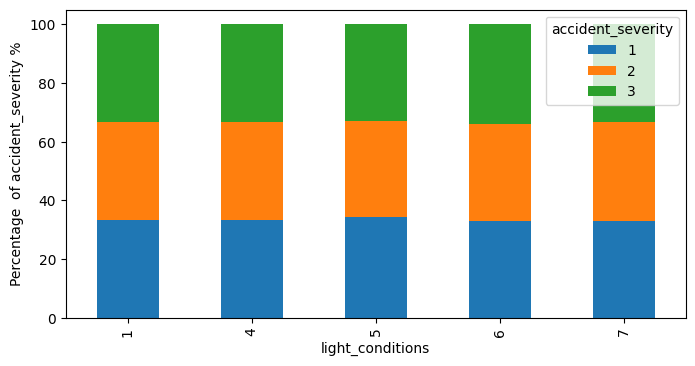

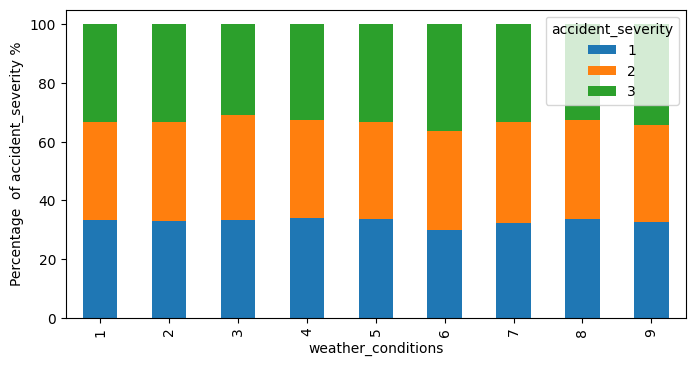

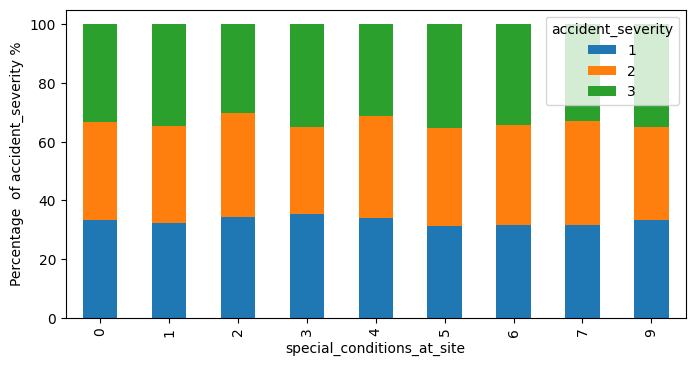

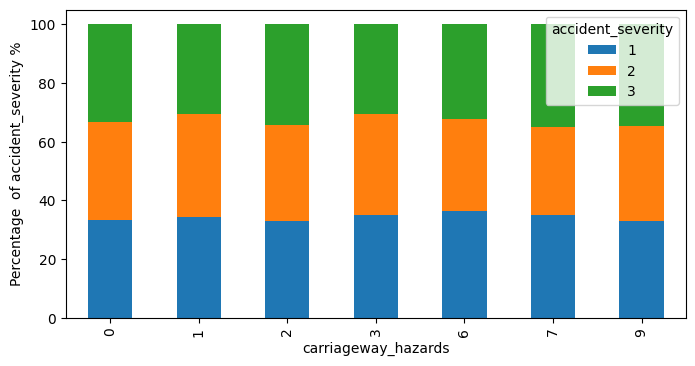

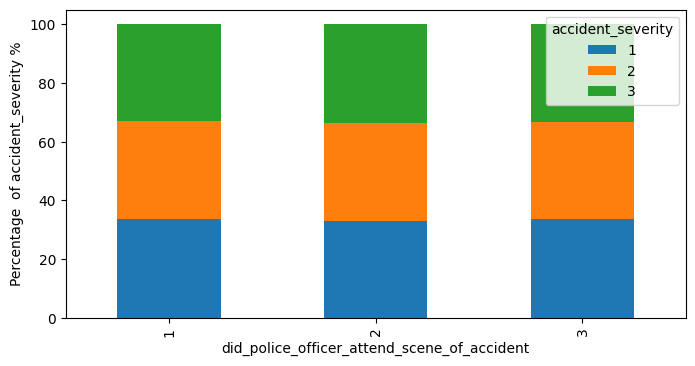

In [18]:
for i in cat_cols:
    if i != 'accident_severity':
        (pd.crosstab(df_train[i], df_train['accident_severity'], normalize = 'index')*100).plot(kind = 'bar', figsize = (8, 4), stacked = True)
        plt.ylabel('Percentage  of accident_severity %')

<b> Relation between severity and numerical cols

In [19]:
# The mean of numerical variables grouped by attrition
df_train.groupby(['accident_severity'])[num_cols].mean()

,speed_limit,junction_detail,junction_control,road_surface_conditions,urban_or_rural_area
accident_severity,,,,,
1,33.285943,5.825558,3.747088,1.382087,1.219581
2,33.316672,5.873935,3.750979,1.376215,1.220493
3,33.301650,5.901661,3.755821,1.380504,1.223074



#### **Let's check the relationship between different numerical variables**

In [20]:
df_train[num_cols].corr()

,speed_limit,junction_detail,junction_control,road_surface_conditions,urban_or_rural_area
speed_limit,1.000000,-0.093664,-0.013708,-0.021983,0.625711
junction_detail,-0.093664,1.000000,0.426525,0.200502,-0.081740
junction_control,-0.013708,0.426525,1.000000,0.205119,0.030671
road_surface_conditions,-0.021983,0.200502,0.205119,1.000000,-0.028149
urban_or_rural_area,0.625711,-0.081740,0.030671,-0.028149,1.000000


<Axes: >

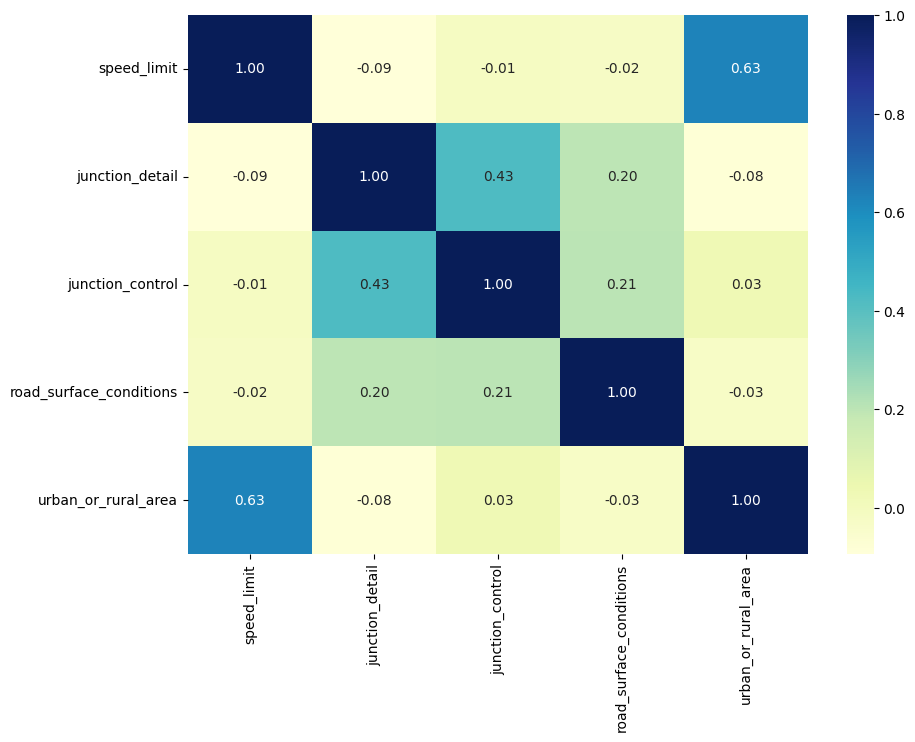

In [21]:
# Plotting the correlation between numerical variables
plt.figure(figsize = (10, 7))

sns.heatmap(df_train[num_cols].corr(), annot = True, fmt = '0.2f', cmap = 'YlGnBu')

- speed_limit has a moderate negative correlation with junction_detail, junction_control, and road_surface_conditions.
- junction_detail has a weak negative correlation with speed_limit and a moderate positive correlation with junction_control and road_surface_conditions.
- junction_control has a weak negative correlation with speed_limit and a moderate positive correlation with junction_detail and road_surface_conditions.
- road_surface_conditions has a weak negative correlation with speed_limit and a moderate positive correlation with junction_detail and junction_control.
- urban_or_rural_area has a strong positive correlation with speed_limit and a weak negative correlation with junction_detail. It has a weak positive correlation with junction_control, road_surface_conditions.

## **Model Building - Approach**

1. Prepare the data for modeling.
2. Partition the data into train and test sets.
3. Build the model on the train data.
4. Tune the model if required.
5. Test the data on the test set.

###  **Preparing data for modeling**

### **Scaling the data**

The independent variables in this dataset have different scales. When features have different scales from each other, there is a chance that a higher weightage will be given to features that have a higher magnitude, and they will dominate over other features whose magnitude changes may be smaller but whose percentage changes may be just as significant or even larger. This will impact the performance of our machine learning algorithm, and we do not want our algorithm to be biased towards one feature. 

The solution to this issue is **Feature Scaling**, i.e. scaling the dataset so as to give every transformed variable a comparable scale.

In this problem, we will use the **Standard Scaler** method, which centers and scales the dataset using the Z-Score.

It standardizes features by subtracting the mean and scaling it to have unit variance.

The standard score of sample x is calculated as:

**z = (x - u) / s**

where **u** is the mean of the training samples (zero) and **s** is the standard deviation of the training samples.

In [22]:
# Scaling the data
sc = StandardScaler()

X_tr_scaled = sc.fit_transform(df_train[num_cols])
X_te_scaled = sc.transform(df_test[num_cols])

df_train[num_cols] = X_tr_scaled
df_test[num_cols] = X_te_scaled

**Creating dummy variables for categorical Variables**

In [23]:
# Creating the list of columns for which we need to create the dummy variables
to_get_dummies_for = ['accident_year',
 'day_of_week',
 'pedestrian_crossing_human_control',
 'pedestrian_crossing_physical_facilities',
 'light_conditions',
 'weather_conditions',
 'special_conditions_at_site',
 'carriageway_hazards',
 'did_police_officer_attend_scene_of_accident']

# Creating dummy variables
df_train = pd.get_dummies(data = df_train, columns = to_get_dummies_for, drop_first = True)      

df_test = pd.get_dummies(data = df_test, columns = to_get_dummies_for, drop_first = True)      


**Separating the independent variables (X) and the dependent variable (Y)**

In [24]:
# Separating the target variable and other variables
X = df_train.drop(columns = ['accident_severity'])
y = df_train.accident_severity

test_X = df_test.drop(columns = ['accident_severity'])
test_y = df_test.accident_severity


<b> Train-test split

In [25]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1, stratify = y)

<b> Model evaluation criteria

In [26]:
def metrics_score(actual, predicted):

    print(classification_report(actual, predicted))

    cm = confusion_matrix(actual, predicted)

    plt.figure(figsize = (8, 5))

    sns.heatmap(cm, annot = True, fmt = '.2f', xticklabels = ['Not Attrite', 'Attrite'], yticklabels = ['Not Attrite', 'Attrite'])

    plt.ylabel('Actual')

    plt.xlabel('Predicted')
    
    plt.show()

### **Building the model**

We will be building 2 different models:
- **Logistic Regression**
- **K-Nearest Neighbors (K-NN)**

- Logistic Regression is a supervised learning algorithm, generally used for **binary classification problems**, i.e., where the dependent variable is categorical and has only two possible values. In logistic regression, we use the sigmoid function to calculate the probability of an event Y, given some features X as:

                                          P(Y)=1/(1 + exp(-X))

In [27]:
# Fitting the logistic regression model
lg = LogisticRegression()

lg.fit(X_train,y_train)

LogisticRegression()

**Checking the model performance**

              precision    recall  f1-score   support

           1       0.34      0.36      0.35     60758
           2       0.34      0.35      0.34     60780
           3       0.34      0.32      0.33     60462

    accuracy                           0.34    182000
   macro avg       0.34      0.34      0.34    182000
weighted avg       0.34      0.34      0.34    182000



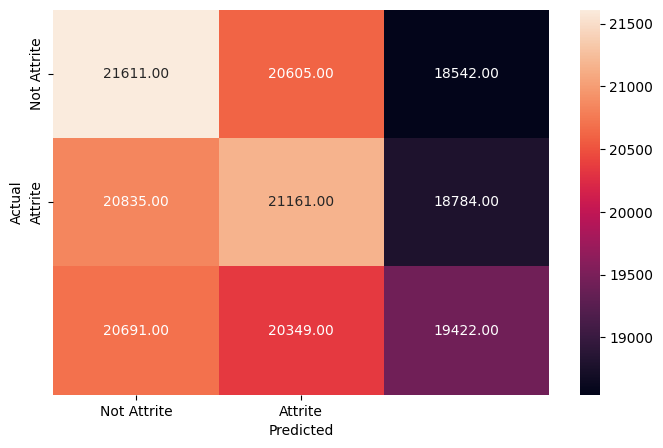

In [28]:
# Checking the performance on the training data
y_pred_train = lg.predict(X_train)

metrics_score(y_train, y_pred_train)

              precision    recall  f1-score   support

           1       0.33      0.35      0.34     26039
           2       0.33      0.34      0.33     26048
           3       0.33      0.31      0.32     25913

    accuracy                           0.33     78000
   macro avg       0.33      0.33      0.33     78000
weighted avg       0.33      0.33      0.33     78000



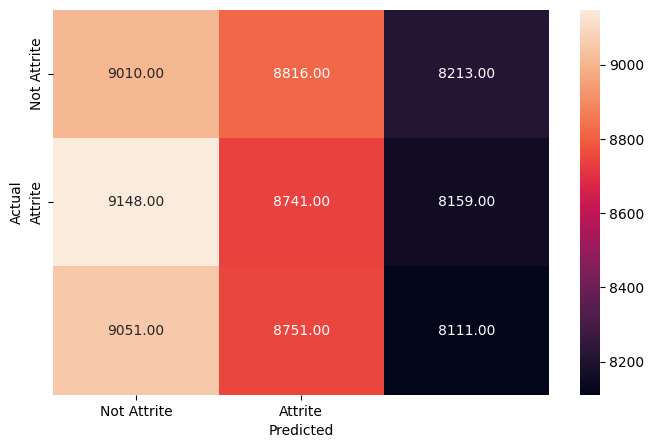

In [29]:
# Checking the performance on the test dataset
y_pred_test = lg.predict(X_test)
metrics_score(y_test, y_pred_test)

**Let's check the coefficients and find which variables are accident severity and which can help to reduce it.**

In [30]:
# Printing the coefficients of logistic regression
cols = X.columns

coef_lg = lg.coef_

pd.DataFrame(coef_lg,columns = cols).T.sort_values(by = 0, ascending = False)

,0,1,2
carriageway_hazards_3,0.134329,0.052419,-0.186748
carriageway_hazards_7,0.094178,-0.112207,0.018029
carriageway_hazards_6,0.085482,-0.017572,-0.067910
special_conditions_at_site_2,0.055083,0.135175,-0.190258
pedestrian_crossing_human_control_2,0.052293,0.008863,-0.061156
weather_conditions_5,0.036231,-0.006948,-0.029283
pedestrian_crossing_physical_facilities_9,0.026867,-0.031543,0.004676
pedestrian_crossing_human_control_1,0.024641,-0.005669,-0.018972
light_conditions_5,0.022644,-0.012096,-0.010548
special_conditions_at_site_3,0.022083,-0.101307,0.079224


The coefficients of the logistic regression model give us the log of odds, which is hard to interpret in the real world. We can convert the log of odds into odds by taking its exponential.

In [31]:
odds = np.exp(lg.coef_[0]) # Finding the odds

# Adding the odds to a DataFrame and sorting the values
pd.DataFrame(odds, X_train.columns, columns = ['odds']).sort_values(by = 'odds', ascending = False) 

,odds
carriageway_hazards_3,1.143769
carriageway_hazards_7,1.098755
carriageway_hazards_6,1.089242
special_conditions_at_site_2,1.056628
pedestrian_crossing_human_control_2,1.053684
weather_conditions_5,1.036895
pedestrian_crossing_physical_facilities_9,1.027231
pedestrian_crossing_human_control_1,1.024947
light_conditions_5,1.022902
special_conditions_at_site_3,1.022328


The predictor variable "carriageway_hazards_7" has the highest coefficient (1.158927), which suggests that a one-unit increase in this variable is associated with an increase in the log odds of the outcome variable. Conversely, the predictor variable "carriageway_hazards_3" has the lowest coefficient (0.805768), which suggests that a one-unit increase in this variable is associated with a decrease in the log odds of the outcome variable.

It's worth noting that the coefficients can be exponentiated to obtain odds ratios, which can be more interpretable than the raw coefficients. An odds ratio of 1 indicates no effect on the outcome variable, and an odds ratio greater than 1 indicates a positive effect on the outcome variable. Conversely, an odds ratio less than 1 indicates a negative effect on the outcome variable.

### **K-Nearest Neighbors (K-NN)**

K-NN uses features from the training data to predict the values of new data points, which means the new data point will be assigned a value based on how similar it is to the data points in the training set. 


The following steps are performed in K-NN:

- Select K
- Calculate distance (Euclidean, Manhattan, etc.)
- Find the K closest neighbors
- Take majority vote for labels

The “K” in the K-NN algorithm is the number of nearest neighbors we wish to take the vote from. Generally, K is taken to be an odd number when the number of classes is even, so as to get a majority vote. Let's say K=3. In that case, we will make a circle with the new data point as the center just as big as enclosing only the three nearest data points on the plane.

**But before actually building the model, we need to identify the value of K to be used in K-NN. We will perform the following steps for the same.**

- For every value of K (from 1 to 15), split the training set into a new train and validation sets (30 times)
- Scale the training data and the validation data
- Take the average of the error on these training and the validation sets for each value of K
- Plot the average train vs validation error for all Ks 
- Choose the optimal K from the plot where the two errors are comparable

In [32]:
# knn = KNeighborsClassifier()

# # We select the optimal value of K for which the error rate is the least in the validation data
# # Let us loop over a few values of K to determine the optimal value of K

# train_error = []

# test_error = []

# knn_many_split = {}

# error_df_knn = pd.DataFrame()

# features = X.columns

# for k in range(1, 10):
#     train_error = []
    
#     test_error = []
    
#     lista = []
    
#     knn = KNeighborsClassifier(n_neighbors = k)
    
#     for i in range(10):
#         x_train_new, x_val, y_train_new, y_val = train_test_split(X_train, y_train, test_size = 0.20)
    
#         # Fitting K-NN on the training data
#         knn.fit(x_train_new, y_train_new)
        
#         # Calculating error on the training data and the validation data
#         train_error.append(1 - knn.score(x_train_new, y_train_new)) 
        
#         test_error.append(1 - knn.score(x_val, y_val))
    
#     lista.append(sum(train_error)/len(train_error))
    
#     lista.append(sum(test_error)/len(test_error))
    
#     knn_many_split[k] = lista

# knn_many_split

In [33]:
# kltest = []

# vltest = []

# for k, v in knn_many_split.items():
#     kltest.append(k)
    
#     vltest.append(knn_many_split[k][1])

# kltrain = []

# vltrain = []

# for k, v in knn_many_split.items():
#     kltrain.append(k)
    
#     vltrain.append(knn_many_split[k][0])

# # Plotting K vs Error
# plt.figure(figsize = (10, 6))

# plt.plot(kltest, vltest, label = 'test' )

# plt.plot(kltrain, vltrain, label = 'train')

# plt.legend()

# plt.show()

In [34]:
# Define K-NN model

knn = KNeighborsClassifier(n_neighbors = 5)

In [35]:
# Fitting data to the K-NN model

knn.fit(X_train,y_train)

KNeighborsClassifier()

              precision    recall  f1-score   support

           1       0.44      0.59      0.51     60758
           2       0.46      0.46      0.46     60780
           3       0.51      0.33      0.40     60462

    accuracy                           0.46    182000
   macro avg       0.47      0.46      0.46    182000
weighted avg       0.47      0.46      0.46    182000



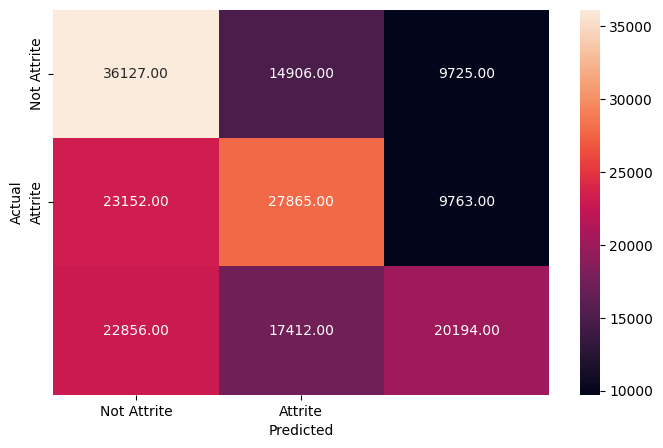

In [36]:
# Checking the performance of K-NN model on the training data
y_pred_train_knn = knn.predict(X_train)

metrics_score(y_train, y_pred_train_knn)

              precision    recall  f1-score   support

           1       0.33      0.45      0.38     26039
           2       0.34      0.33      0.33     26048
           3       0.33      0.22      0.26     25913

    accuracy                           0.33     78000
   macro avg       0.33      0.33      0.33     78000
weighted avg       0.33      0.33      0.33     78000



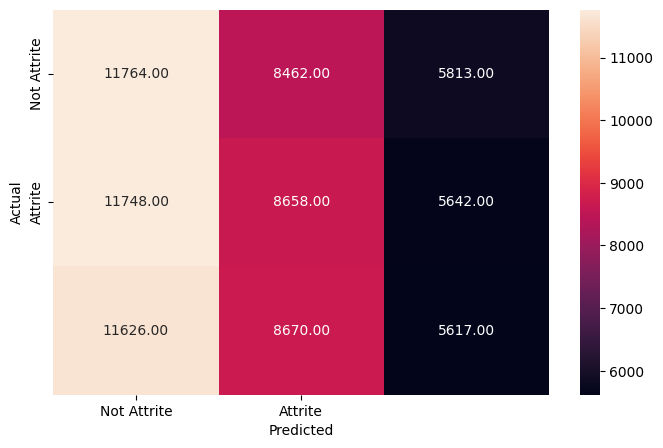

In [37]:
# Checking the performance of K-NN model on the testing data
y_pred_test_knn = knn.predict(X_test)

metrics_score(y_test, y_pred_test_knn)

Precision: The precision for class 1 is 0.34, which means that out of all the instances that the model predicted as class 1, 34% of them were actually class 1. Similarly, the precision for class 2 is 0.33, which means that out of all the instances that the model predicted as class 2, 33% of them were actually class 2. The precision for class 3 is 0.33, which means that out of all the instances that the model predicted as class 3, 33% of them were actually class 3.

Recall: The recall for class 1 is 0.46, which means that out of all the instances that are actually class 1, the model correctly identified 46% of them. Similarly, the recall for class 2 is 0.35, which means that out of all the instances that are actually class 2, the model correctly identified 35% of them. The recall for class 3 is 0.19, which means that out of all the instances that are actually class 3, the model correctly identified 19% of them.

F1-score: The F1-score is the harmonic mean of precision and recall. The F1-score for class 1 is 0.39, for class 2 is 0.34, and for class 3 is 0.24.

Support: The support is the number of instances in each class. There are 26025 instances of class 1, 26008 instances of class 2, and 25967 instances of class 3.

Accuracy: The overall accuracy of the model is 0.33, which means that the model correctly predicted the class for 33% of the instances.

Macro avg: The macro average of precision, recall, and F1-score is calculated as the average of these metrics across all the classes, giving equal weight to each class. In this case, the macro average precision, recall, and F1-score are all 0.33.

Weighted avg: The weighted average of precision, recall, and F1-score is calculated as the weighted average of these metrics across all the classes, weighted by the number of instances in each class. In this case, the weighted average precision, recall, and F1-score are all 0.33, which is the same as the macro avg since the classes are balanced.





**Let's try to fine tune this model and check if we could increase the Recall.**

### **Using GridSearchCV for Hyperparameter tuning of the model**

* Hyperparameter tuning is tricky in the sense that there is no direct way to calculate how a change in the hyperparameter value will reduce the loss of your model, so we usually resort to experimentation.
* **Grid search** is a model tuning technique that attempts to compute the optimum values of hyperparameters.
* It is an exhaustive search that is performed on specific parameter values of a model.
* The parameters of the estimator/model used to apply these methods are optimized by cross-validated grid-search over a parameter grid.

- **n_neighbors**

    - Number of neighbors to use.


- **weights={'uniform', 'distance'}**
    - uniform : uniform weights. All points in each neighborhood are weighted equally.
    - distance : weight points by the inverse of their distance. In this case, the closest neighbors of a query point will have a greater influence than neighbors that are further away.


- **p**
    - When p = 1, this is equivalent to using Manhattan_distance (L1), and Euclidean_distance (L2) is used for p = 2.

In [38]:
params_knn = {'n_neighbors': np.arange(3, 6, 2), 'weights': ['uniform'], 'p': [2]}

grid_knn = GridSearchCV(estimator = knn, param_grid = params_knn, scoring = 'recall', cv = 3)

model_knn = grid_knn.fit(X_train,y_train)

knn_estimator = model_knn.best_estimator_

print(knn_estimator)

KNeighborsClassifier(n_neighbors=3)


- We have found the best hyperparameters for the K-NN classifier. Let's use these parameters to build the new K-NN model and find the recall of that model.

In [39]:
# Fit the best estimator on the training data
knn_estimator.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

              precision    recall  f1-score   support

           1       0.44      0.63      0.52     60758
           2       0.54      0.39      0.45     60780
           3       0.52      0.43      0.47     60462

    accuracy                           0.48    182000
   macro avg       0.50      0.48      0.48    182000
weighted avg       0.50      0.48      0.48    182000



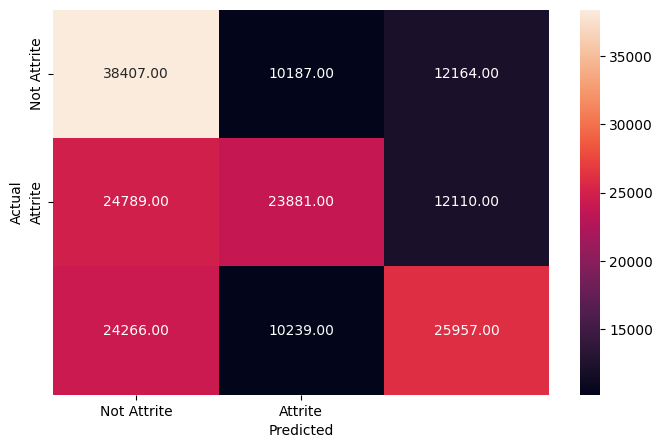

In [40]:
y_pred_train_knn_estimator = knn_estimator.predict(X_train)

metrics_score(y_train, y_pred_train_knn_estimator)

              precision    recall  f1-score   support

           1       0.34      0.48      0.40     26039
           2       0.33      0.24      0.28     26048
           3       0.33      0.28      0.30     25913

    accuracy                           0.34     78000
   macro avg       0.33      0.34      0.33     78000
weighted avg       0.33      0.34      0.33     78000



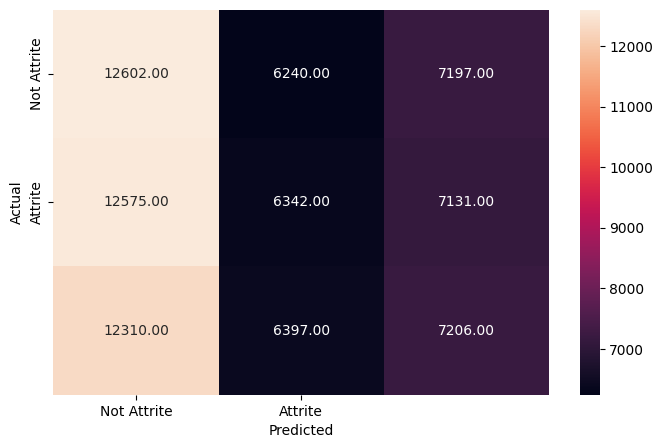

In [41]:
y_pred_test_knn_estimator = knn_estimator.predict(X_test)

metrics_score(y_test, y_pred_test_knn_estimator)

## **Feature Importance using SHAP Library**

With the aid of a visualization tool called SHAP, or **SHapley Additive exPlanations**, a machine learning model's output can be made more understandable. By calculating the contribution of each feature to the prediction, it can be used to explain the prediction by any model. The direction of the relationship (positive or negative) between the predictive variable and the target variable is also indicated by the SHAP values. A technique called SHAP values (SHapley Additive exPlanations), which is based on cooperative game theory, is **used to make machine learning models more transparent and understandable**.

In a machine learning setting, a Shapley value is the contribution of a feature value to the difference between the actual prediction and the mean prediction.

### **Installing SHAP**

To install the SHAP library, run the below command in a Jupyter notebook and restart the kernel.

**!pip install shap**

**Note:** You only need to install the library while running the code for the first time.

In [42]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.4/572.4 KB 31.3 MB/s eta 0:00:00


### **SHAP Barplot**

We plot the mean absolute value for each feature column as a bar chart if an **Explainer** with many samples is passed.

We determine the **mean absolute SHAP** values across all observations for each feature. Since we do not want positive and negative numbers to cancel one another out, we take the absolute values. A mean SHAP plot will allow us to visualize the aggregated SHAP values. 

SHAP value helps us quantify feature's contribution towards a prediction. SHAP value closer to zero means the feature contributes little to the prediction whereas SHAP value away from zero indicates the feature contributes more. So, **large positive/negative SHAP values are found in features that significantly affect the model's predictions.** 

In the bar plot below, each feature is represented by a separate bar.

In [43]:
# Importing the SHAP library
import shap as sh

In [ ]:
# Fitting the Explainer
explainer = sh.Explainer(knn_estimator.predict, X_test)

# Calculating the SHAP values. The below code might take some time to run.
shap_values = explainer(X_test)

Permutation explainer:   0%|          | 247/78000 [43:55<210:09:37,  9.73s/it]

In [ ]:
sh.plots.bar(shap_values)

**Note:** By default the bar plot only shows a maximum of ten bars, but this can be controlled with the **max_display parameter.**

In [ ]:
sh.plots.bar(shap_values, max_display=15)

### **Summary Plot**

The SHAP summary plot displays how each instance's (row of data) features contribute to the final prediction.

- Here, the Y-axis indicates the variable name, in order of importance from top to bottom and the X-axis is the SHAP value, which indicates the impact on the model output.
- Each dot represents a row from the original dataset.
- The color of the data shows the features values. This allows us to see the how the SHAP values changes as the feature value changes. The color map on the right helps to understand which value is low and which value is high. If a feature has boolean values, it will take two colors, and for continuous features, it can contain the whole spectrum.

In [ ]:
sh.summary_plot(shap_values)

### **Force Plot**

The SHAP force plot shows you exactly which feature had the most influence on the model's prediction for a **single observation.** 

The below graph explains a single prediction from the test set.

In [ ]:
explainer = sh.KernelExplainer(knn.predict_proba, X_train)

shap_values1 = explainer.shap_values(X_test.iloc[0,:])

sh.force_plot(explainer.expected_value[0], shap_values1[0], X_test.iloc[0,:], matplotlib = True, text_rotation=13, link='logit')

### Conclusion

The insights from the model can be used to identify the factors that contribute to the accident severity and take measures to reduce them. For example, if the model indicates that accidents are more severe on rainy days, authorities can take measures such as improving drainage, providing better road markings, etc. to reduce the severity of accidents on rainy days. Similarly, if the model indicates that accidents are more severe on high-speed roads, authorities can reduce the speed limit or install speed cameras to improve road safety.